In [1]:
%matplotlib inline 
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

In [3]:
import os

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from scipy.stats import spearmanr

In [4]:
from access_biology_data import meta, relations, annotation, properties
from access_literature_data import medline
from access_science_shared import standardizer

import sys
sys.path.append('./../src/')
from aging_tools import inout, export, calculators
from access_aging_data import chaperome, earlier_studies, sequencing


In [5]:
import random

In [6]:
import matplotlib
matplotlib.rcParams.update({'font.size': 10})

In [7]:
save_images = False
save_late_images = True

In [8]:
from narrative import nar181026_heat_confidence_genes

In [9]:
ref_genes = standardizer.reference_genes(10090, 'orp')  # only consider supported protein coding-genes

/Users/tstoeger/opt/miniconda3/envs/aging/lib/python3.7/site-packages/fastparquet/dataframe.py:5: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import CategoricalIndex, RangeIndex, Index, MultiIndex


In [10]:
p = export.get_material_path('190406_transcript_length_tilting/stats_on_imbalance_190407_0052.xlsx')

In [11]:
df = pd.read_excel(p)

In [12]:
df[
    (df['younger']==18) &
    (df['older']==24)
].sort_values('corr')

,condition,corr,pval,younger,older,tissue
89,Kidney_0_18_24,-0.728915,0.000000e+00,18,24,Kidney
139,SI_0_18_24,-0.317852,2.883093e-275,18,24,SI
159,Stomach_0_18_24,-0.286819,8.181994e-204,18,24,Stomach
19,BAT_0_18_24,-0.228894,2.943881e-130,18,24,BAT
169,WAT_0_18_24,-0.201073,2.459274e-105,18,24,WAT
59,Esophagus_0_18_24,-0.197133,1.269468e-102,18,24,Esophagus
9,Adrenal_0_18_24,-0.157661,1.576011e-66,18,24,Adrenal
29,Blood_0_18_24,-0.113157,1.581532e-27,18,24,Blood
129,MuscSat_0_18_24,-0.099460,1.400919e-24,18,24,MuscSat
149,Skin_0_18_24,-0.082477,1.188635e-19,18,24,Skin


In [13]:
df[
    (df['younger']==4) & 
    (df['older']==24)
]

,condition,corr,pval,younger,older,tissue
3,Adrenal_0_4_24,-0.162002,1.071439e-58,4,24,Adrenal
13,BAT_0_4_24,-0.334887,1.302679e-218,4,24,BAT
23,Blood_0_4_24,-0.646453,3.798712e-95,4,24,Blood
33,Brain_0_4_24,0.193236,7.135376e-96,4,24,Brain
43,Cerebellum_0_4_24,-0.033110,4.951573e-04,4,24,Cerebellum
53,Esophagus_0_4_24,-0.310671,1.923841e-151,4,24,Esophagus
63,GutEP_0_4_24,-0.254853,6.099791e-122,4,24,GutEP
73,Heart_0_4_24,-0.199111,4.546564e-101,4,24,Heart
83,Kidney_0_4_24,-0.599801,0.000000e+00,4,24,Kidney
93,LI_0_4_24,-0.522198,0.000000e+00,4,24,LI


In [14]:
df = df[
    (df['younger']==4) 
]

In [15]:
tissues = df['tissue'].unique()
ages = [9, 12, 18, 24]

In [16]:
df.loc[:, 'log_pval'] = df['pval'].apply(lambda x: -np.log10(x))

In [17]:
df.pivot(index='tissue', columns='older', values='log_pval').apply(lambda x: np.round(x, 2)).median(1).sort_values()

tissue
MuscSat         9.215
BAT            10.975
Cerebellum     11.485
Adrenal        12.230
WAT            18.120
Liver          21.660
Lung           31.385
SI             40.815
Blood          43.275
GutEP          54.040
Brain          87.285
Esophagus     110.570
Heart         111.150
Skin          143.700
Stomach       217.460
LI                inf
Kidney            inf
dtype: float64

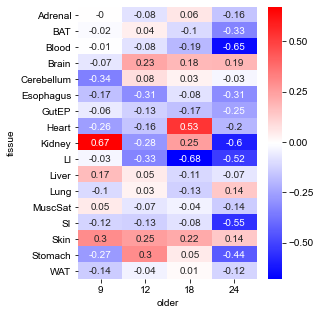

In [18]:
plt.figure(figsize=(4, 5))




sns.heatmap(
    df.pivot(index='tissue', columns='older', values='corr').apply(lambda x: np.round(x, 2)),
    cmap='bwr',
    annot=True

)



if save_images:
    export.export_image(
        '190412_extent_and_significance_of_tiliting/tilt.pdf')

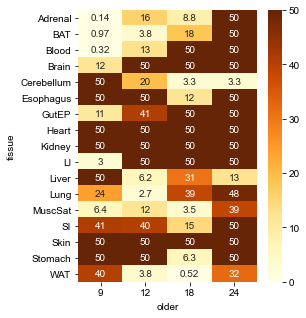

In [19]:
plt.figure(figsize=(4, 5))



h = df.pivot(index='tissue', columns='older', values='log_pval').apply(lambda x: np.round(x, 2))
f = h>50
h[f] = 50

sns.heatmap(
    h,
    cmap='YlOrBr', 
    annot=True,
    vmax=50,
    vmin=0
)



if save_images:
    export.export_image(
        '190412_extent_and_significance_of_tiliting/pval_tilt.pdf')

In [20]:
def nice_plot(h,vmax):
    t = h.copy()
    
    tissue_dict = {
        'Adrenal': 'Adrenal gland',
        'BAT': 'Brown adipose tissue',
        'Blood': 'Blood',
        'Brain': 'Frontal cortex',
        'Cerebellum': 'Cerebellum',
        'Esophagus': 'Esophagus',
        'GutEP': 'Gut epithelium',
        'Heart': 'Heart',
        'Kidney': 'Kidney',
        'LI': 'Large intestine',
        'Liver': 'Liver',
        'Lung': 'Lung',
        'MuscSat': 'Muscle',
        'SI': 'Small intestine',
        'Skin': 'Skin',
        'Stomach': 'Stomach',
        'WAT': 'White adipose tissue'
    }
    
    t = t.rename(index=tissue_dict)
    t = t.sort_index()
    
    plt.figure(figsize=(4, 5))


    sns.heatmap(
        t, 
        cmap='YlOrBr', 
        annot=True,
        vmin=0,
        vmax=50
    )

In [21]:
save_images = True

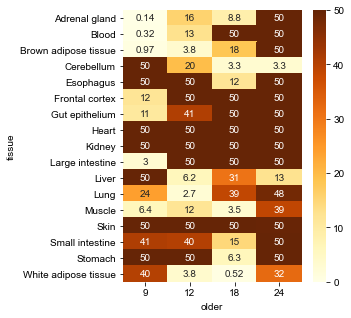

In [22]:
nice_plot(
    h,
    vmax=50
)



if save_images:
    export.export_image(
        '190412_extent_and_significance_of_tiliting/pval_tilt_nice.pdf')

In [23]:
def nice_bwr(h):
    t = h.copy()
    
    tissue_dict = {
        'Adrenal': 'Adrenal gland',
        'BAT': 'Brown adipose tissue',
        'Blood': 'Blood',
        'Brain': 'Frontal cortex',
        'Cerebellum': 'Cerebellum',
        'Esophagus': 'Esophagus',
        'GutEP': 'Gut epithelium',
        'Heart': 'Heart',
        'Kidney': 'Kidney',
        'LI': 'Large intestine',
        'Liver': 'Liver',
        'Lung': 'Lung',
        'MuscSat': 'Muscle',
        'SI': 'Small intestine',
        'Skin': 'Skin',
        'Stomach': 'Stomach',
        'WAT': 'White adipose tissue'
    }
    
    t = t.rename(index=tissue_dict)
    t = t.sort_index()
    
    plt.figure(figsize=(4, 5))


    sns.heatmap(
        t, 
        cmap='bwr', 
        annot=True,
    )

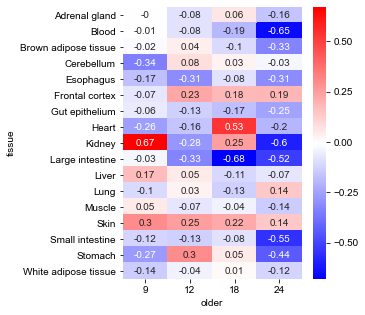

In [24]:
nice_bwr(
    df.pivot(index='tissue', columns='older', values='corr').apply(lambda x: np.round(x, 2))
)



if save_images:
    export.export_image(
        '190412_extent_and_significance_of_tiliting/tilt_nice.pdf')

In [25]:
p = export.get_material_path('190406_transcript_length_tilting/stats_on_imbalance_220306_2109.xlsx')
df = pd.read_excel(p)

In [26]:
def nice_plot(h,vmax):
    t = h.copy()
    
    tissue_dict = {
        'Adrenal': 'Adrenal gland',
        'BAT': 'Brown adipose tissue',
        'Blood': 'Blood',
        'Brain': 'Frontal cortex',
        'Cerebellum': 'Cerebellum',
        'Esophagus': 'Esophagus',
        'GutEP': 'Gut epithelium',
        'Heart': 'Heart',
        'Kidney': 'Kidney',
        'LI': 'Large intestine',
        'Liver': 'Liver',
        'Lung': 'Lung',
        'MuscSat': 'Muscle',
        'SI': 'Small intestine',
        'Skin': 'Skin',
        'Stomach': 'Stomach',
        'WAT': 'White adipose tissue'
    }
    
    t = t.rename(index=tissue_dict)
    t = t.sort_index()
    
    plt.figure(figsize=(4, 5))


    sns.heatmap(
        t, 
        cmap='YlOrBr', 
        annot=True,
        vmin=0,
        vmax=vmax,
        fmt='g'
    )

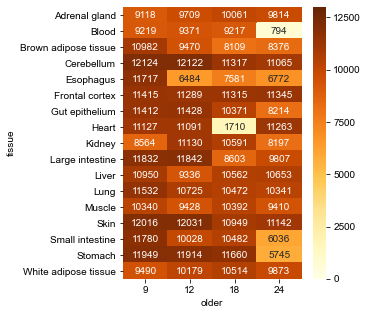

In [27]:
nice_plot(
    df[df['younger']==4].pivot(index='tissue', columns='older', values='genes'),
    13000
)

if save_late_images:
    export.export_image(
        '190412_extent_and_significance_of_tiliting/number_of_genes.pdf')